In [ ]:
file_path = "/content/drive/MyDrive/CS 7641/Classification/classification.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install catboost --quiet

In [ ]:
#!pip install numpy==1.26.4 --force-reinstall

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import pandas as pd
df = pd.read_csv(file_path)

In [ ]:
df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,Sunday_opening,Sunday_closing,Sunday_hours_open,pre_cov_num_pos,pre_cov_num_neg,post_cov_num_pos,post_cov_num_neg,total_pos_reviews,total_neg_reviews,total_num_reviews
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,...,07:00,21:00,14.0,57.0,16.0,12.0,2.0,69.0,18.0,87.0
1,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,...,08:00,22:00,14.0,1.0,2.0,0.0,3.0,1.0,5.0,6.0
2,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,...,NaN,NaN,NaN,10.0,9.0,0.0,0.0,10.0,9.0,19.0
3,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,...,06:00,21:00,15.0,1.0,5.0,1.0,3.0,2.0,8.0,10.0
4,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,NaN,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,...,15:00,18:00,3.0,7.0,1.0,3.0,0.0,10.0,1.0,11.0


In [ ]:
selected_features = [
    'alcohol', 'attire', 'delivery', 'drive_thru', 'noise_level',
    'outdoor_seating', 'parking', 'reservations', 'smoking', 'table_service',
    'takeout', 'wifi', 'price_range', 'review_count'
]
target = 'stars'

df = df[selected_features + [target]]
cat_features = [
    'alcohol', 'attire', 'delivery', 'drive_thru', 'noise_level',
    'outdoor_seating', 'parking', 'reservations', 'smoking', 'table_service',
    'takeout', 'wifi'
]
for col in cat_features:
    df[col] = df[col].fillna('Unknown').astype(str)
df['price_range'] = pd.to_numeric(df['price_range'], errors='coerce').fillna(-1)
df['review_count'] = pd.to_numeric(df['review_count'], errors='coerce').fillna(-1)

X = df[selected_features]
y = df[target]

<ipython-input-8-ed08273f2e3f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Unknown').astype(str)
<ipython-input-8-ed08273f2e3f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Unknown').astype(str)


In [ ]:
'''# ✅ Train CatBoost model
#!pip install -U numpy==1.23.5

from catboost import CatBoostRegressor, Pool


# make variables for 80% training

# make variable for 70% training
train_pool = Pool(X, y, cat_features=cat_features)

model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric='RMSE',
    early_stopping_rounds=20,
    verbose=100
)

model.fit(train_pool)
'''

0:	learn: 0.8128397	total: 142ms	remaining: 1m 10s
100:	learn: 0.6929371	total: 5.07s	remaining: 20s
200:	learn: 0.6854784	total: 8.09s	remaining: 12s
300:	learn: 0.6815095	total: 11.2s	remaining: 7.44s
400:	learn: 0.6782471	total: 15.8s	remaining: 3.91s
499:	learn: 0.6752878	total: 20.2s	remaining: 0us


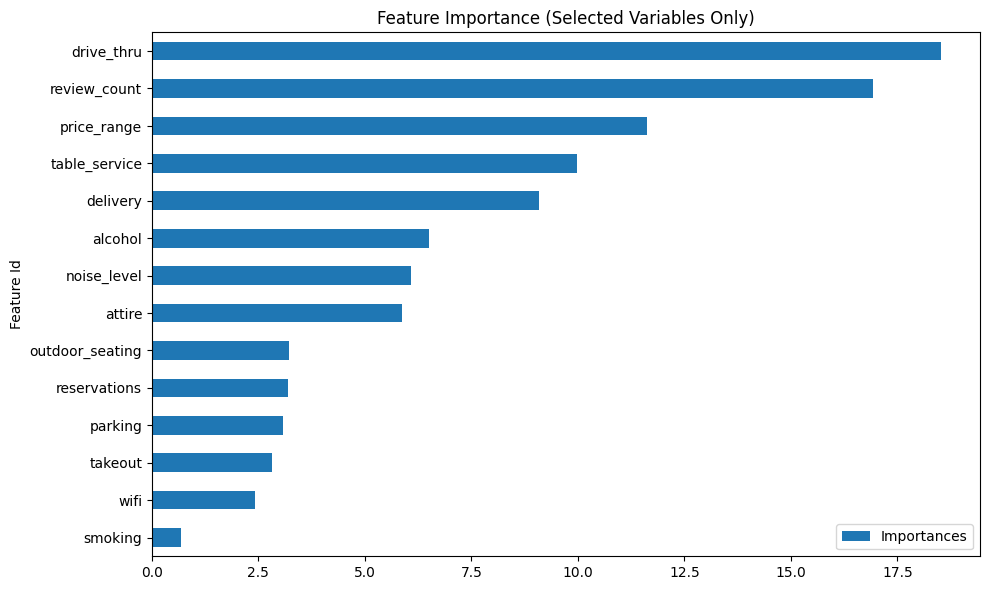

0:	learn: 0.9092895	total: 88.2ms	remaining: 1m 28s
100:	learn: 0.9138923	total: 7.28s	remaining: 1m 4s
200:	learn: 0.9161711	total: 15.8s	remaining: 1m 2s
300:	learn: 0.9177197	total: 23.4s	remaining: 54.3s
400:	learn: 0.9203489	total: 33.4s	remaining: 49.9s
500:	learn: 0.9233461	total: 42.6s	remaining: 42.4s
600:	learn: 0.9257498	total: 51.6s	remaining: 34.2s
700:	learn: 0.9282619	total: 1m 1s	remaining: 26.3s
800:	learn: 0.9305396	total: 1m 11s	remaining: 17.7s
900:	learn: 0.9324324	total: 1m 20s	remaining: 8.81s
999:	learn: 0.9341589	total: 1m 30s	remaining: 0us
Confusion Matrix:
[[ 222  499]
 [  86 3208]]


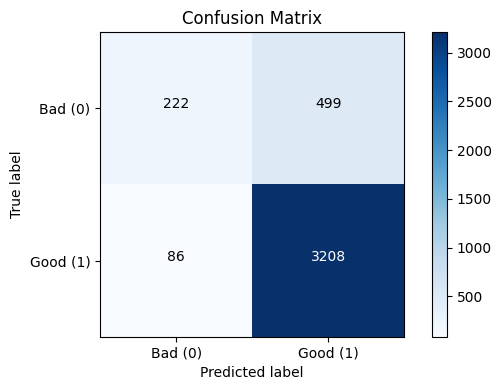


Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.31      0.43       721
           1       0.87      0.97      0.92      3294

    accuracy                           0.85      4015
   macro avg       0.79      0.64      0.67      4015
weighted avg       0.84      0.85      0.83      4015



In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Convert the continuous 'stars' target into a binary classification target:
# 1 (good) if stars >= 3, else 0 (bad)
df['binary_stars'] = (df[target] >= 3).astype(int)

# Prepare features and the new binary target
X_binary = df[selected_features]
y_binary = df['binary_stars']

# Split the data into 80% training and 20% testing (using stratify to keep class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42, stratify=y_binary
)

# Create Pool objects for CatBoost that include the categorical features
train_pool_binary = Pool(X_train, y_train, cat_features=cat_features)
test_pool_binary = Pool(X_test, y_test, cat_features=cat_features)

# Initialize the CatBoostClassifier model.
# Adjust the hyperparameters as needed; here we use similar settings to the regressor.
model_classifier = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.03,
    depth=8,
    l2_leaf_reg=3,
    bootstrap_type='Bayesian',
    random_strength=1,
    early_stopping_rounds=50,
    eval_metric='F1',
    verbose=100,
    random_seed=77
)
# Fit the classifier on the training pool
model_classifier.fit(train_pool_binary)

# Predict on the test set
y_pred = model_classifier.predict(test_pool_binary)

# Evaluate: compute the confusion matrix and print it
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Plot the confusion matrix using matplotlib only
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Bad (0)', 'Good (1)'])
plt.yticks(tick_marks, ['Bad (0)', 'Good (1)'])

# Annotate each cell with the numeric count
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

# Print a detailed classification report (precision, recall, f1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


<ipython-input-15-2900ff0c0cf6>:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


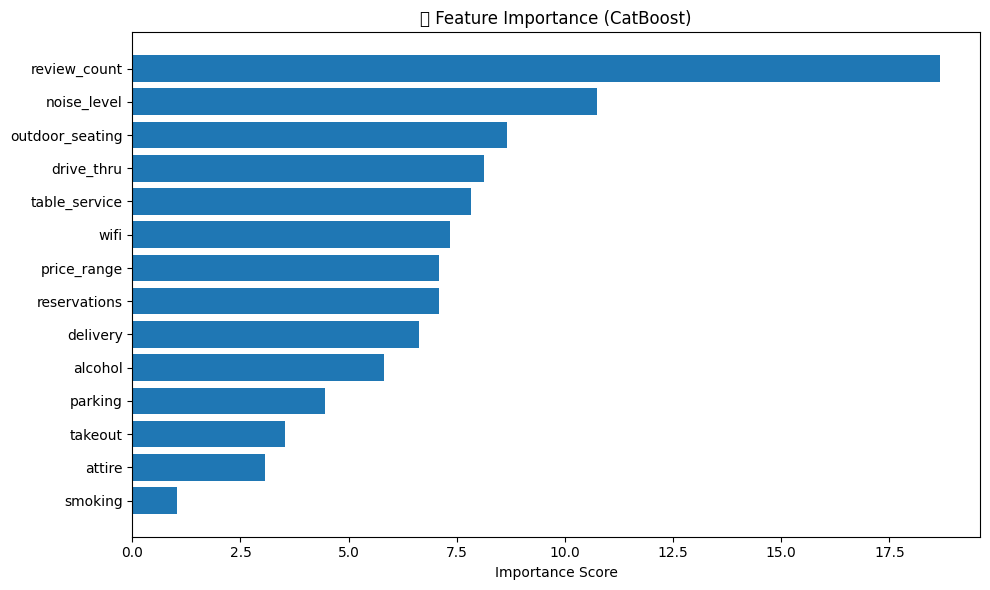

In [ ]:
import matplotlib.pyplot as plt

# Get feature importances as a DataFrame
feature_importances = model_classifier.get_feature_importance(prettified=True)

# Sort and plot
feature_importances_sorted = feature_importances.sort_values(by='Importances', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importances_sorted['Feature Id'], feature_importances_sorted['Importances'])
plt.title("📊 Feature Importance (CatBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()
